<a href="https://colab.research.google.com/github/So-nja/2022_WISET/blob/main/Computer_Vision/Simple_MNIST_convnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#단순한 MNIST CNN(합성곱 신경망) 

*이 문서는 keras 예제를 분석하여 해설을 작성한 것입니다.*

<br>[예제 페이지](https://keras.io/examples/vision/mnist_convnet/)
<br>
<br>

MNIST 데이터셋을 99%의 정확도로 분류 가능한 단순한 구조의 Convolution Neural Network를 구성해본다. 

#Setup

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


#데이터 준비



11490434/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


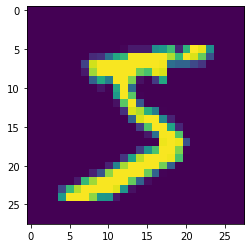

In [2]:
# Model / data parameters
# 0~9까지의 숫자 손글씨 데이터 = 10개 클래스, 각각 가로세로 28px의 흑백 데이터
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
#데이터를 호출해 학습용 데이터와 실험용 데이터를 나눈다. 
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#데이터 샘플
plt.imshow(x_train[0])


# Scale images to the [0, 1] range
# 흑백 이미지를 정규화한다. 
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)   #축을 추가한한다. 
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
#결과값을 one-hot encoding 해주는 함수 utils.to_categorical
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#CNN 모델 생성

In [3]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]

)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

conv2d 레이어의 Parmeter 수는 다음에 의해서 결정된다.

**Parmeter 수 = (conv필터 가로 x 세로 x 데이터 깊이 + bias 1개) x 필터 수**

ex) 

conv2d_2 Layer의 경우 - (3 x 3 x 1 + 1) x 32 = 320

conv2d_3 Layer의 경우 - (3 x 3 x 32 + 1) x 64 =  18496

#모델 학습

In [4]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
#여러 카테고리를 분류하니까 + one-hot 인코딩이므로 
#loss function 은 categorical_crossentropy, 
#모델 마지막 레이어의 activation function 은 softmax
# categorical_crossentropy 와 sparse_categorical_crossentropy(정수 형태) 와 비교하여 기억하자 

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
#validation_split 설정시 그만큼의 데이터를 검증용으로 쓰겠다는 것을 의미한다. 

Epoch 1/15
422/422 [==============================] - 11s 7ms/step - loss: 0.3565 - accuracy: 0.8924 - val_loss: 0.0839 - val_accuracy: 0.9788
Epoch 2/15
422/422 [==============================] - 2s 5ms/step - loss: 0.1155 - accuracy: 0.9652 - val_loss: 0.0606 - val_accuracy: 0.9837
Epoch 3/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0831 - accuracy: 0.9740 - val_loss: 0.0461 - val_accuracy: 0.9888
Epoch 4/15
422/422 [==============================] - 3s 6ms/step - loss: 0.0748 - accuracy: 0.9768 - val_loss: 0.0412 - val_accuracy: 0.9892
Epoch 5/15
422/422 [==============================] - 2s 6ms/step - loss: 0.0659 - accuracy: 0.9796 - val_loss: 0.0412 - val_accuracy: 0.9893
Epoch 6/15
422/422 [==============================] - 2s 6ms/step - loss: 0.0579 - accuracy: 0.9821 - val_loss: 0.0346 - val_accuracy: 0.9905
Epoch 7/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0522 - accuracy: 0.9839 - val_loss: 0.0365 - val_accuracy: 0.9903
Epoch

#학습한 모델 평가

Test loss: 0.027421072125434875
Test accuracy: 0.9908000230789185


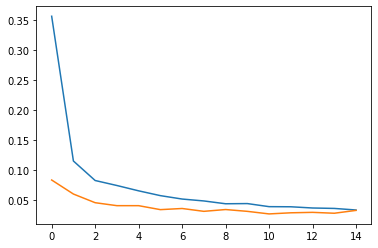

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show() 

In [6]:
#테스트 데이터로 실제 예측측을 해본다. 
y_ = model.predict(x_test)
print(y_)

#argmax 로 가장 예측값이 높게 나온 원소를 추출하여 확인할 수 있다.
predicted = np.argmax(y_, axis=1)
print(predicted)

313/313 [==============================] - 1s 2ms/step
[[1.4375263e-09 6.2018807e-10 1.4256610e-05 ... 9.9997139e-01
  4.0066610e-08 3.5044775e-06]
 [1.3000263e-07 2.6099710e-07 9.9999881e-01 ... 5.7369354e-13
  2.2686139e-07 4.1298746e-13]
 [1.0807557e-06 9.9960738e-01 9.4321804e-06 ... 5.1350515e-05
  6.9278423e-05 2.2007334e-06]
 ...
 [2.0720470e-13 8.6652290e-11 1.2829254e-11 ... 5.0168443e-09
  6.7872975e-07 8.4001471e-08]
 [1.0871436e-07 1.7911225e-14 8.1172669e-09 ... 1.1939974e-12
  8.4937847e-04 1.6479508e-08]
 [1.0741447e-07 6.8767247e-13 2.9374617e-06 ... 5.0590032e-14
  8.0488026e-06 1.4799260e-10]]
[7 2 1 ... 4 5 6]


7
2
1
0
4


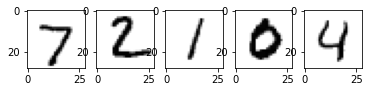

In [9]:
#시각화하여 확인하기 , imshow 에는 cmap=plt.cm.binary 옵션을 주어 흑백으로 처리하였다. 
#보기좋게 한번에 여러 자료들을 나타내고자 한다. Matplotlib.subplot을 이용하였다. 
for i in range (5):
   print(predicted[i])
   plt.subplot(1,5,i+1)
   plt.imshow(x_test[i].squeeze(), cmap=plt.cm.binary)

plt.show()  